In [6]:
%load_ext autoreload
%autoreload
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import qutip as qt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/jbrown/opt/anaconda3/envs/stablebase/lib/python3.6/site-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


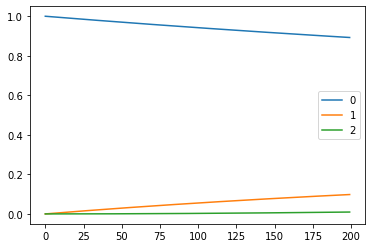

In [67]:
# Define the number of timesteps in the evolution
steps=200
# Define the number of randomly sampled unitaries to use at each timestep
num_runs=100
# generate the initial state
rho=np.zeros(9)
rho[0]=1
rho_in = rho
# Diagonal Initial State
rho_in_diag = np.array([rho_in[0],rho_in[4],rho_in[8]])

# Function that carries out one step of the evolution by randomly sampling the Hamiltonians for use 
# in the QuTiP solver
def get_1_step(rho, timestep):
    global omega12, omega23
    tlist = [0,timestep]
    rho_out = np.zeros((num_runs,3,3))
    average_rho_out = np.zeros((3,3))
    for i in range(num_runs):
        delta1 = np.random.uniform(0,omega12*0.15)
        delta2 = np.random.uniform(0,omega12*0.15)
        H=qt.Qobj(np.array([[0,-omega12,0],
                        [-omega12, delta1, -omega23],
                        [0, -omega23, delta2]]))
        
        output = qt.mesolve(H, qt.Qobj(rho.reshape(3,3)), tlist)
        
        rho_out[i]=output.states[-1].full()
    
    average_rho_out = np.average(rho_out, axis=0)
    rho_final = average_rho_out.flatten()
    rho_diag = average_rho_out.diagonal().flatten()
    return rho_final, rho_diag
# for plotting
full_obs_vec = np.zeros((steps,9))
diag_obs_vec = np.zeros((steps,3))

for step in range(steps):
    omega12=10
    omega23=10
    full_obs_vec[step,:] = rho_in
    diag_obs_vec[step,:] = rho_in_diag
    rho, rho_in_diag = get_1_step(rho_in, 0.0025)
    rho_in = rho
    
plt.plot(range(steps),full_obs_vec[:,0], label=0)
plt.plot(range(steps),full_obs_vec[:,4], label = 1)
plt.plot(range(steps),full_obs_vec[:,8], label=2)
plt.legend()

